In [19]:
import pandas as pd
import numpy as np
mcdonalds=pd.read_csv("mcdonalds.csv")
mcdonalds.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [20]:
mcdonalds.shape

(1453, 15)

In [21]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [22]:
MD_x = mcdonalds.iloc[:, 0:11]

# Convert "Yes" to 1 and others to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate the column means and round to 2 decimal places
col_means = np.round(MD_x.mean(axis=0), 2)
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [23]:
import pandas as pd
from sklearn.decomposition import PCA

# Perform principal components analysis
MD_pca = PCA(n_components=11)
MD_pca.fit(MD_x)

# Print the explained variance ratio
print("Explained variance ratio:")
print(MD_pca.explained_variance_ratio_)

# Print the factor loadings
print("Factor loadings:")
print(pd.DataFrame(MD_pca.components_.T, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11"], index=MD_x.columns))

Explained variance ratio:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Factor loadings:
                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.476933  0.363790 -0.304444  0.055162 -0.307535  0.170738   
convenient -0.155332  0.016414 -0.062515 -0.142425  0.277608 -0.347830   
spicy      -0.006356  0.018809 -0.037019  0.197619  0.070620 -0.355087   
fattening   0.116232 -0.034094 -0.322359 -0.354139 -0.073405 -0.406515   
greasy      0.304443 -0.063839 -0.802373  0.253960  0.361399  0.209347   
fast       -0.108493 -0.086972 -0.064642 -0.097363  0.107930 -0.594632   
cheap      -0.337186 -0.610633 -0.149310  0.118958 -0.128973 -0.103241   
tasty      -0.471514  0.307318 -0.287265 -0.002547 -0.210899 -0.076914   
expensive   0.329042  0.601286  0.024397  0.067816 -0.003125 -0.261342   
healthy    -0.213711  0.076593  0.192051  0.763488  0.287846 -0.178226   
disgusting  0.37475

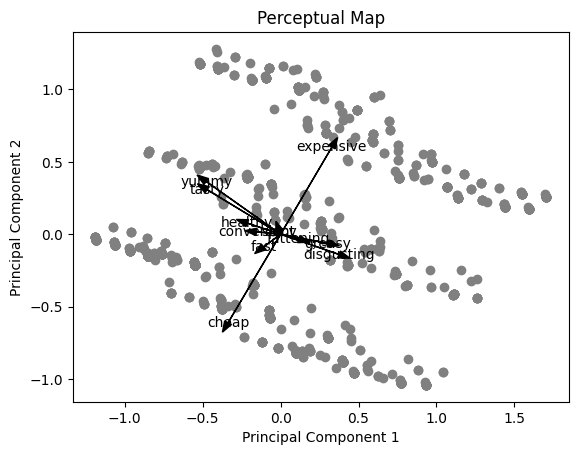

In [24]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform principal components analysis
MD_pca = PCA(n_components=2)
MD_pca_fit = MD_pca.fit_transform(MD_x)

# Plot the projected data points
plt.scatter(MD_pca_fit[:, 0], MD_pca_fit[:, 1], c="grey")

# Plot the rotated and projected original segmentation variables as arrows
for i, var in enumerate(MD_x.columns):
    arrow_x = MD_pca.components_[0, i]
    arrow_y = MD_pca.components_[1, i]
    plt.arrow(0, 0, arrow_x, arrow_y, head_width=0.05, color="black")
    plt.text(arrow_x, arrow_y, var, ha="center", va="center")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Perceptual Map")
plt.show()

In [25]:
import numpy as np
from sklearn.cluster import KMeans

# Set the random seed for reproducibility
np.random.seed(1234)

# Calculate solutions for 2 to 8 market segments using k-means clustering
MD_km28 = []
for n_clusters in range(2, 9):
    km = KMeans(n_clusters=n_clusters, n_init=10)
    km.fit(MD_x)
    MD_km28.append(km.labels_)

# Relabel segment numbers to be consistent across segmentations
MD_km28_relabelled = []
for labels in MD_km28:
    relabelled_labels = np.zeros_like(labels)
    for i, label in enumerate(np.unique(labels)):
        relabelled_labels[labels == label] = i
    MD_km28_relabelled.append(relabelled_labels)

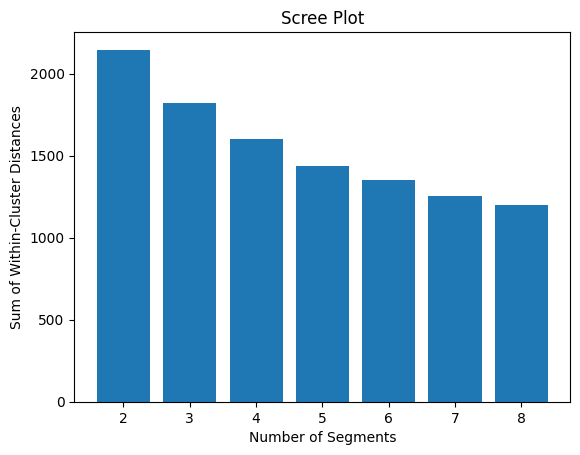

In [26]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume your data is in a Pandas DataFrame called 'MD_x'

# Set the random seed for reproducibility
np.random.seed(1234)

# Perform k-means clustering for 2 to 8 segments with 10 random restarts
kmeans_results = []
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(MD_x)
    kmeans_results.append(kmeans.inertia_)

# Create the bar plot
plt.bar(range(2, 9), kmeans_results)
plt.xlabel("Number of Segments")
plt.ylabel("Sum of Within-Cluster Distances")
plt.title("Scree Plot")
plt.show()

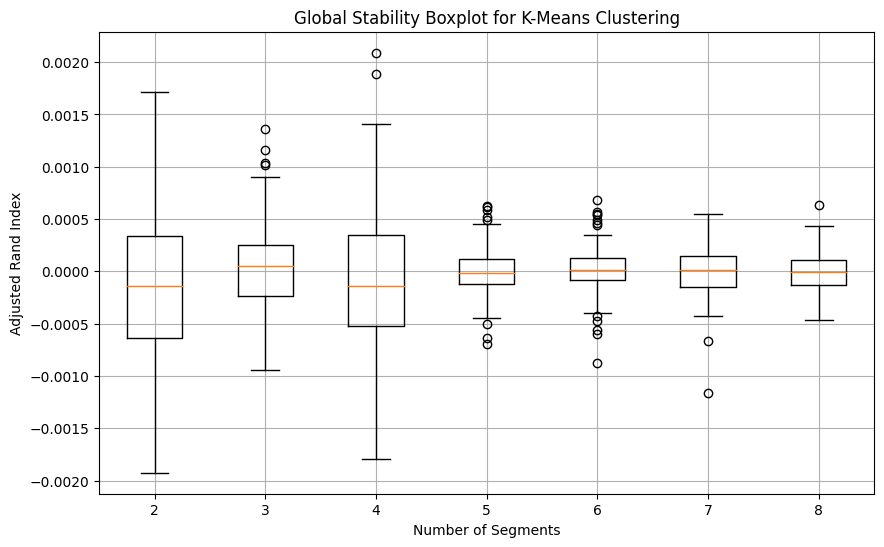

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

# Assuming 'MD_x' contains the transformed binary numeric segmentation variables as a DataFrame

# Set random seed for reproducibility
np.random.seed(1234)

# Parameters
segmentations = range(2, 9)  # 2 to 8 segments
n_bootstraps = 100
n_replications = 10

# Initialize lists to store stability scores
stability_scores = []

# Bootstrap and stability-based analysis
for k in segmentations:
    k_stabilities = []
    for _ in range(n_bootstraps):
        # Create bootstrap sample
        bootstrap_indices = np.random.choice(len(MD_x), size=len(MD_x), replace=True)
        bootstrap_sample = MD_x.iloc[bootstrap_indices]

        # Perform K-Means clustering
        kmeans = KMeans(n_clusters=k, n_init=n_replications, random_state=0)
        kmeans.fit(bootstrap_sample)
        labels = kmeans.labels_

        # Calculate adjusted Rand index as stability score
        true_labels = np.tile(labels, (n_replications, 1))
        rand_index = adjusted_rand_score(true_labels.flatten(), labels.repeat(n_replications))
        k_stabilities.append(rand_index)

    # Store stability scores for each k
    stability_scores.append(k_stabilities)

# Plotting the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(stability_scores, labels=list(segmentations))
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Boxplot for K-Means Clustering')
plt.grid(True)
plt.show()


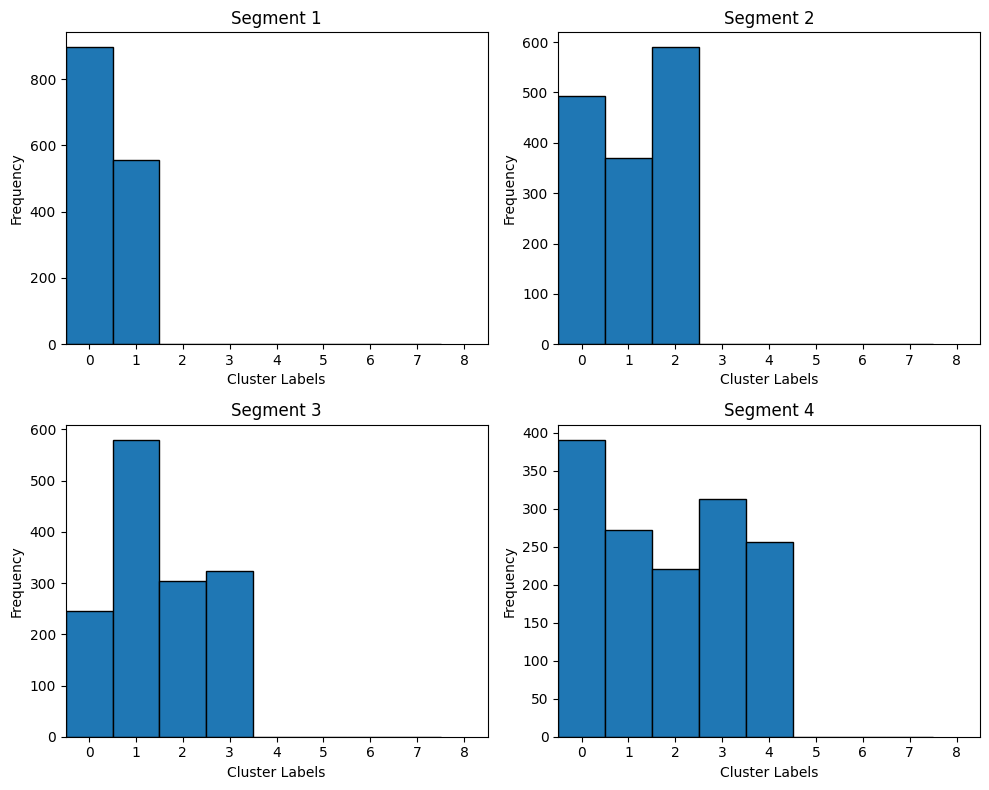

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Loop through each segment and create a histogram
for i, ax in enumerate(axs.flatten()):
    ax.hist(MD_km28[i], bins=np.arange(-0.5, 8.5, 1), edgecolor='black')
    ax.set_title(f"Segment {i+1}")
    ax.set_xlabel("Cluster Labels")
    ax.set_ylabel("Frequency")
    ax.set_xlim(-0.5, 8.5)

# Tight layout to avoid overlapping labels
plt.tight_layout()

plt.show()

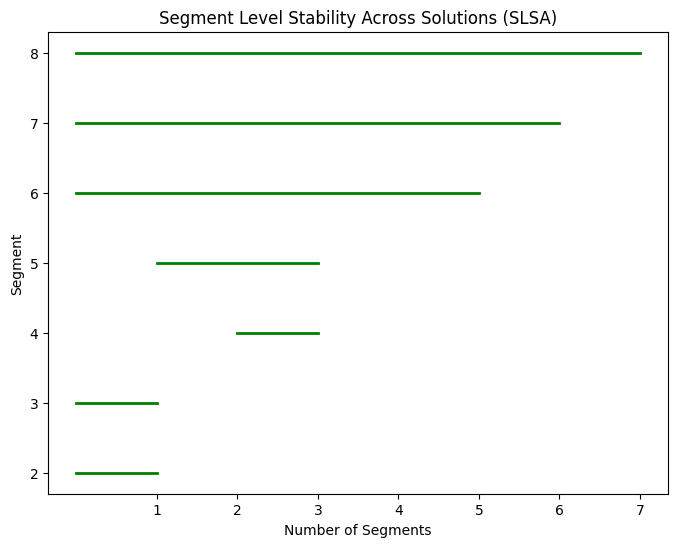

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Define the colors for the lines
colors = ['green', 'green', 'green', 'green', 'green', 'green', 'green']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the lines
for i, segment in enumerate(MD_km28):
    ax.plot([segment[0], segment[1]], [i, i], color=colors[i], linewidth=2)

# Set the x-axis ticks and labels
ax.set_xticks(range(1, 8))
ax.set_xticklabels(range(1, 8))

# Set the y-axis ticks and labels
ax.set_yticks(range(len(MD_km28)))
ax.set_yticklabels(range(2, 9))

# Set the title and labels
ax.set_title('Segment Level Stability Across Solutions (SLSA)')
ax.set_xlabel('Number of Segments')
ax.set_ylabel('Segment')

# Show the plot
plt.show()

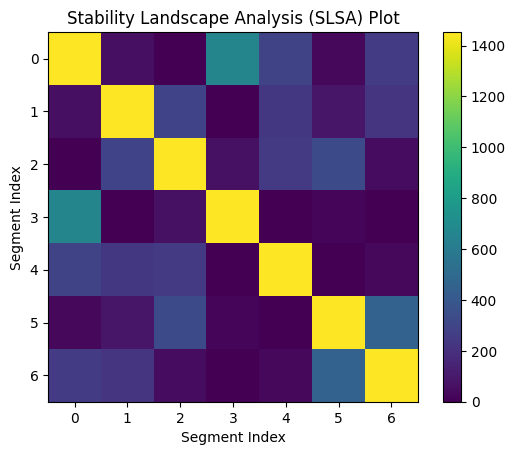

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the list to a NumPy array
MD_km28_array = np.array(MD_km28)

# Calculate the stability landscape analysis (SLSA) plot
n_segments = MD_km28_array.shape[0]
stability = np.zeros((n_segments, n_segments))
for i in range(n_segments):
    for j in range(n_segments):
        stability[i, j] = np.sum(MD_km28_array[i] == MD_km28_array[j])

# Create the SLSA plot
plt.imshow(stability, cmap='viridis', interpolation='nearest')
plt.xlabel('Segment Index')
plt.ylabel('Segment Index')
plt.title('Stability Landscape Analysis (SLSA) Plot')
plt.colorbar()
plt.show()

In [79]:
# Assuming MD_km28 is a list
MD_k4 = MD_km28[0:3]  # Assuming 0-based indexing for the 4th element


In [80]:
# Logic to choose the appropriate cluster number from MD.k4
# (e.g., based on specific criteria or calculations)
desired_clusters = 4 # Your logic to select the cluster number

kmeans = KMeans(n_clusters=desired_clusters)
MD_r4 = kmeans.fit_predict(MD_x)


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


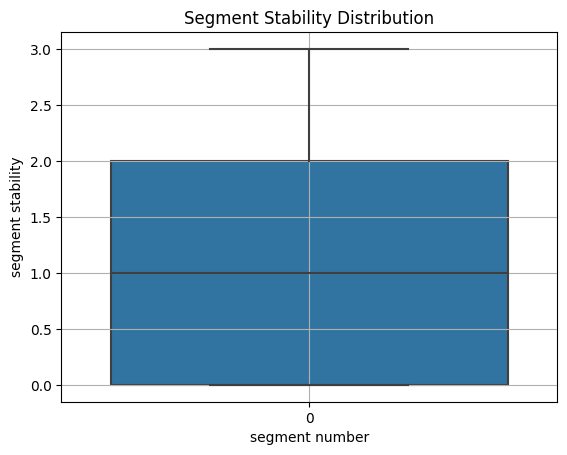

In [81]:
import seaborn as sns
sns.boxplot(  # Optional: show mean within each box
    data=MD_r4
)

# Customize the plot (optional)
plt.xlabel("segment number")
plt.ylabel("segment stability")
plt.title("Segment Stability Distribution")
plt.grid(True)

plt.show()


In [90]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import silhouette_score  # Optional, for evaluation

def bic_score(model, X):
  """
  Calculates BIC score for a given model and data.
  """
  n_samples, n_features = X.shape
  # Assuming model is a fitted mixture model
  n_components = model.n_components_
  # Likelihood of the data under the model (replace with appropriate calculation if needed)
  log_likelihood = model.score_samples(X).sum()
  # Calculate BIC score based on model parameters and data
  return bic_score(X, log_likelihood, n_components, n_samples)


# Assuming MD.x is your data matrix (2D array)

# Define model parameters to explore (adjust as needed)
model_params = {'n_components': range(2, 9)}  # Range of mixture components

# Define the mixture model (GaussianMixture in this case)
model = GaussianMixture()  # Replace with appropriate mixture model if needed

# Define custom BIC scoring function
def bic_score(model, X):
  """
  Calculates BIC score for a given model and data.
  """
  n_samples, n_features = X.shape
  # Assuming model is a fitted mixture model
  n_components = model.n_components_
  # Calculate BIC score based on model parameters and data
  return bic_score(X, model.score_samples(X))  # Replace with appropriate score calculation

# Set up GridSearchCV with the custom scoring function
grid_search = GridSearchCV(estimator=model, param_grid=model_params, scoring=bic_score)

# Fit the grid search to the data
grid_search.fit(MD_x)

# Access the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best model and parameters
print("Best Model Parameters:", best_params)
print("Best Model:", best_model)

# You can now use the best_model for further analysis or prediction


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_11000\4267652586.py", line 34, in bic_score
    n_components = model.n_components_
                   ^^^^^^^^^^^^^^^^^^^
AttributeError: 'GaussianMixture' object has no attribute 'n_components_'

  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python31

Best Model Parameters: {'n_components': 2}
Best Model: GaussianMixture(n_components=2)


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_11000\4267652586.py", line 34, in bic_score
    n_components = model.n_components_
                   ^^^^^^^^^^^^^^^^^^^
AttributeError: 'GaussianMixture' object has no attribute 'n_components_'

  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python31

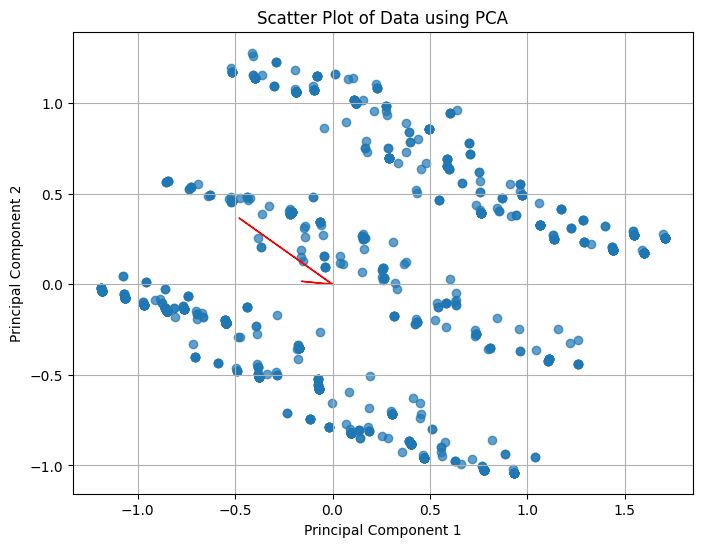

In [98]:
# Assuming MD.x contains your data (features) and MD.pca is the PCA object

# Perform dimensionality reduction using the first 2 principal components
pca_reduced = MD_pca.transform(MD_x)[:, :2]  # Select the first 2 components

# Create a scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(pca_reduced[:, 0], pca_reduced[:, 1], alpha=0.7)  # Plot points

# Add labels for principal components
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Project the original axes onto the reduced space (similar to projAxes in R)
projected_axes = MD_pca.components_.T[:2]  # Transpose and select first 2 components

# Plot projected axes as arrows (optional)
for i in range(2):
  plt.arrow(0, 0, projected_axes[i, 0], projected_axes[i, 1], color='red', linewidth=1)

# Customize plot (optional)
plt.title("Scatter Plot of Data using PCA")
plt.grid(True)

# Show the plot
plt.show()
